In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load data
data = pd.read_csv(r"D:\city_hour.csv")
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [ ]:
data.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False
707871,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707872,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707873,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [ ]:
print(data.isnull().count())
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

City          707875
Datetime      707875
PM2.5         707875
PM10          707875
NO            707875
NO2           707875
NOx           707875
NH3           707875
CO            707875
SO2           707875
O3            707875
Benzene       707875
Toluene       707875
Xylene        707875
AQI           707875
AQI_Bucket    707875
dtype: int64
City
City
False    707875
Name: count, dtype: int64

Datetime
Datetime
False    707875
Name: count, dtype: int64

PM2.5
PM2.5
False    562787
True     145088
Name: count, dtype: int64

PM10
PM10
False    411138
True     296737
Name: count, dtype: int64

NO
NO
False    591243
True     116632
Name: count, dtype: int64

NO2
NO2
False    590753
True     117122
Name: count, dtype: int64

NOx
NOx
False    584651
True     123224
Name: count, dtype: int64

NH3
NH3
False    435333
True     272542
Name: count, dtype: int64

CO
CO
False    621358
True      86517
Name: count, dtype: int64

SO2
SO2
False    577502
True     130373
Name: count, dtype: int64


In [ ]:
data = data.dropna()
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
50889,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
50890,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
50893,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
50894,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.10,21.38,161.68,0.10,2.35,0.00,191.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,Visakhapatnam,2020-06-30 13:00:00,12.75,45.00,0.55,17.20,9.32,9.12,0.11,10.82,45.80,0.00,0.00,0.00,50.0,Good
707864,Visakhapatnam,2020-06-30 14:00:00,10.75,36.75,1.10,17.75,10.28,4.65,0.34,4.38,50.73,0.00,0.00,0.00,51.0,Satisfactory
707865,Visakhapatnam,2020-06-30 15:00:00,15.75,30.25,0.95,13.75,8.07,4.67,0.30,2.90,41.55,0.00,0.00,0.00,51.0,Satisfactory
707866,Visakhapatnam,2020-06-30 16:00:00,14.00,29.50,1.77,20.70,12.45,8.08,0.45,7.12,39.23,0.00,0.00,0.00,51.0,Satisfactory


In [ ]:
pollutants = data.drop(['City','Datetime', 'AQI_Bucket', 'Benzene', 'Toluene', 'Xylene', 'SO2'], axis=1)
pollutants

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,O3,AQI
50888,104.00,148.50,1.93,23.00,13.75,9.80,0.10,117.62,155.0
50889,94.50,142.00,1.33,16.25,9.75,9.65,0.10,136.23,159.0
50890,82.75,126.50,1.47,14.83,9.07,9.70,0.10,149.92,173.0
50893,68.50,117.00,1.35,13.60,8.35,7.40,0.10,161.70,191.0
50894,69.25,112.25,1.52,11.80,7.55,9.25,0.10,161.68,191.0
...,...,...,...,...,...,...,...,...,...
707863,12.75,45.00,0.55,17.20,9.32,9.12,0.11,45.80,50.0
707864,10.75,36.75,1.10,17.75,10.28,4.65,0.34,50.73,51.0
707865,15.75,30.25,0.95,13.75,8.07,4.67,0.30,41.55,51.0
707866,14.00,29.50,1.77,20.70,12.45,8.08,0.45,39.23,51.0


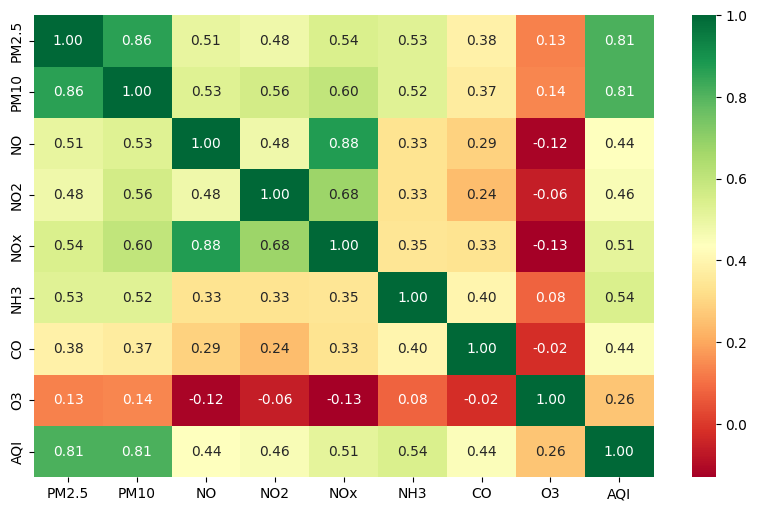

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = pollutants.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(pollutants[top_corr_features].corr(),annot=True,cmap="RdYlGn", fmt=".2f")

In [ ]:
# Select features and target variable
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'O3', 'NH3']
target = 'AQI'

# Preprocess data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data[target], test_size=0.2, random_state=42)

# Define LSTM model
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
  tf.keras.layers.LSTM(units=32, return_sequences=False),
  tf.keras.layers.Dense(units=1)
])

# Compile model
model.compile(loss='mse', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
3232/3232 [==============================] - 19s 5ms/step - loss: 18315.3672
Epoch 2/20
3232/3232 [==============================] - 15s 5ms/step - loss: 10040.0742
Epoch 3/20
3232/3232 [==============================] - 16s 5ms/step - loss: 5889.7378
Epoch 4/20
3232/3232 [==============================] - 16s 5ms/step - loss: 3254.2288
Epoch 5/20
3232/3232 [==============================] - 16s 5ms/step - loss: 2432.2961
Epoch 6/20
3232/3232 [==============================] - 16s 5ms/step - loss: 2129.7795
Epoch 7/20
3232/3232 [==============================] - 16s 5ms/step - loss: 2010.4338
Epoch 8/20
3232/3232 [==============================] - 16s 5ms/step - loss: 1954.3910
Epoch 9/20
3232/3232 [==============================] - 16s 5ms/step - loss: 1918.1045
Epoch 10/20
3232/3232 [==============================] - 17s 5ms/step - loss: 1894.6063
Epoch 11/20
3232/3232 [==============================] - 16s 5ms/step - loss: 1869.4760
Epoch 12/20
3232/3232 [================

In [ ]:
# Evaluate model
predictions = model.predict(X_test)
predictions_flattened = predictions.ravel()
y_test_flattened = y_test.ravel()

mse = mean_squared_error(predictions_flattened, y_test_flattened)
mae = np.mean(np.abs(predictions_flattened - y_test_flattened))
r2 = r2_score(predictions_flattened, y_test_flattened)

print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

808/808 [==============================] - 2s 2ms/step
MSE: 1753.5761171361921
MAE: 27.96669403072631
R-squared: 0.7750425811929731


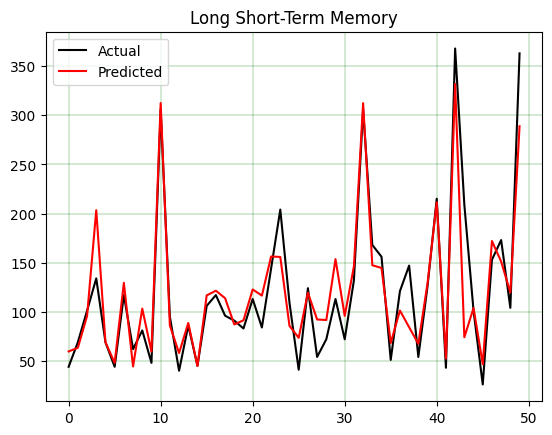

<Figure size 1200x800 with 0 Axes>

In [ ]:
y_test_array = y_test[:50]
y_pred_LSTM = predictions[:50]
df1 = pd.DataFrame({'Actual': y_test_array.ravel(), 'Predicted': y_pred_LSTM.ravel()})
df1.plot(kind='line', color=['black', 'Red'])
plt.title("Long Short-Term Memory")
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.figure(figsize=(12, 8))
plt.show()

In [ ]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test_array
result["PREDICTED AQI"] = y_pred_LSTM
result["DIFFERENCE"] = result["PREDICTED AQI"] - result["ACTUAL AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["PREDICTED AQI"] - result["ACTUAL AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(10)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
185024,44.0,59.643730,15.643730,35.553932
688199,69.0,63.331032,-5.668968,8.215896
701188,101.0,95.677696,-5.322304,5.269608
291304,134.0,203.373230,69.373230,51.771067
68812,69.0,69.087128,0.087128,0.126272
62189,44.0,47.966385,3.966385,9.014511
702809,117.0,129.439896,12.439896,10.632389
474012,62.0,44.312943,-17.687057,28.527512
379627,81.0,103.198730,22.198730,27.405840
466659,48.0,59.511024,11.511024,23.981301


In [ ]:
import pickle
with open('model4.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model4.pkl', 'rb') as f:
    model = pickle.load(f)